<a href="https://colab.research.google.com/github/Team-AlmaBetter/playstore-analysis/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is Google Play Store? Well, from the mobile standpoint, it’s an app, though it’s actually a platform. So, it’s essentially far more than that, which is something we’ll get down to in a minute. In this article, we’ll talk about the Google Play Store, and try to answer quite a few questions, most of which are quite basic. That is the point of this article, to share as much information about Google’s Play Store platform as possible. So, let’s get started.

Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as Chrome OS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.[2] Content that has been purchased on Google Play Movies & TV and Google Play Books can be accessed on a web browser, and through the Android and iOS apps.

Lets take a look at the data, which consist of two file

*   Play store data.csv
*   user_review

# **Import the required libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# **Mount the Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path where the data is kept

path="/content/drive/MyDrive/Project/Play Store Data.csv"

# **1.Gathering data**

This step is about getting to know the data and understanding what has to be done before the data becomes useful in a particular context. This can be done by reading the CSV file and doing initial statistical analysis.
Though the dataset may seem to have the correct datatypes for each column, we need to check it. Inconsistent datatypes will create issues while dealing with problems.

In [5]:
# creating a dataframe for play store data.csv

df_Play_Store_duplicate_data = pd.read_csv(path)

In [6]:
# lets read the dataset df_Play_Store_duplicate_data

df_Play_Store_duplicate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Play store data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

# **2. Data cleaning**

**What is data cleaning?**

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.

# **Step 1: Remove duplicate or irrelevant observations**
Remove unwanted observations from your dataset, including duplicate observations or irrelevant observations. Duplicate observations will happen most often during data collection. When you combine data sets from multiple places, scrape data, or receive data from clients or multiple departments, there are opportunities to create duplicate data. De-duplication is one of the largest areas to be considered in this process. Irrelevant observations are when you notice observations that do not fit into the specific problem you are trying to analyze. For example, if you want to analyze data regarding millennial customers, but your dataset includes older generations, you might remove those irrelevant observations. This can make analysis more efficient and minimize distraction from your primary target—as well as creating a more manageable and more performant dataset.


In [7]:
# Checking the duplicate rows 
duplicate_rows =df_Play_Store_duplicate_data[df_Play_Store_duplicate_data.duplicated()].count()
print(f'There are total Duplicate rows \n {duplicate_rows} ')


There are total Duplicate rows 
 App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64 


In [8]:
# Lets drop the duplicate rows
df_Play_Store= df_Play_Store_duplicate_data[~df_Play_Store_duplicate_data.duplicated()] 

In [9]:
# read the data of play store data after the removing duplicate data
df_Play_Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Step 2: Filter unwanted outliers**
Often, there will be one-off observations where, at a glance, they do not appear to fit within the data you are analyzing. If you have a legitimate reason to remove an outlier, like improper data-entry, doing so will help the performance of the data you are working with. However, sometimes it is the appearance of an outlier that will prove a theory you are working on. Remember: just because an outlier exists, doesn’t mean it is incorrect. This step is needed to determine the validity of that number. If an outlier proves to be irrelevant for analysis or is a mistake, consider removing it.

In [10]:
# lets check the data 
df_Play_Store.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


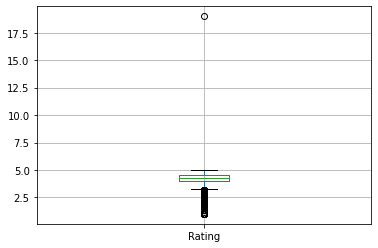

In [11]:
# lets plot the boxplot graph
df_Play_Store.boxplot()

As we can notice that ratings going till 17.5
Whereas the maximum rating is 5.

So there is an outlier.

So, lets check the rows which have rating more than 5

In [12]:
# checking rating more that 5

df_Play_Store[df_Play_Store['Rating']>5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# lets drop this outlier 
df_Play_Store.drop([10472],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
# Checking the droped row is present or not
df_Play_Store.loc[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


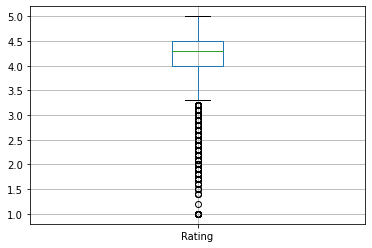

In [15]:
#lets check plot the graph again
df_Play_Store.boxplot()

##  Haresha's code Area

## Belows changes were made  by Ajit

In [17]:
#  Checking the min installs and max installs
df_Play_Store['Installs'].min(),df_Play_Store['Installs'].max()

('0', '500,000,000+')

In [27]:
df_Play_Store['App'].value_counts()

ROBLOX                                            9
8 Ball Pool                                       7
Bubble Shooter                                    6
Helix Jump                                        6
Zombie Catchers                                   6
                                                 ..
Meme Generator                                    1
Jewels Crush- Match 3 Puzzle                      1
Fat No More - Be the Biggest Loser in the Gym!    1
Bible                                             1
Cyprus CU Mobile Banking                          1
Name: App, Length: 9659, dtype: int64

In [24]:
boolean = df_Play_Store['App'].duplicated().any()
boolean

True

##In the above mentioned data, some of the apps are having multiple rows. Let's check out if the data is identical or not.


In [28]:
df_Play_Store[df_Play_Store['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


#As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [32]:
df_Play_Store.drop_duplicates(inplace=True)

In [40]:
df_Play_Store['Reviews']

8884       27
8532    40467
324       115
4541      259
4636      573
        ...  
6334      414
4362      718
2575    22098
7559       19
882     11661
Name: Reviews, Length: 9659, dtype: int64

In [41]:
df_Play_Store = df_Play_Store.loc[df_Play_Store.groupby(['App'])['Reviews'].idxmax()]

In [44]:
df_Play_Store.describe()#Summary statistics after cleaning

,Rating,Reviews
count,8196.000000,9.659000e+03
mean,4.173267,2.168041e+05
std,0.536253,1.831430e+06
min,1.000000,0.000000e+00
25%,4.000000,2.500000e+01
50%,4.300000,9.690000e+02
75%,4.500000,2.945350e+04
max,5.000000,7.815831e+07


#Checking any column which having only 10% values to drop that column

In [48]:
# 10% rows of the column
length= len(df_Play_Store)*0.1
print(length)
df_Play_Store.dropna(thresh=length,axis=1,inplace=True)

965.9000000000001


In [50]:
# Checking the null values are being filled or not 
print(df_Play_Store.isnull().sum())

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [51]:
df_Play_Store.drop_duplicates(inplace=True)

Performing basic opration to check data cleaning is properly done or not

In [52]:
df_Play_Store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [57]:
df_Play_Store.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up


In [53]:
df_Play_Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 8884 to 882
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


In [54]:
df_Play_Store.describe()

,Rating,Reviews
count,8196.000000,9.659000e+03
mean,4.173267,2.168041e+05
std,0.536253,1.831430e+06
min,1.000000,0.000000e+00
25%,4.000000,2.500000e+01
50%,4.300000,9.690000e+02
75%,4.500000,2.945350e+04
max,5.000000,7.815831e+07


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


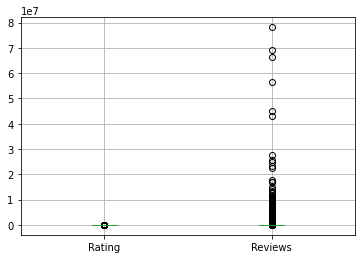

In [55]:
df_Play_Store.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9af8ddfd90>,
      dtype=object)

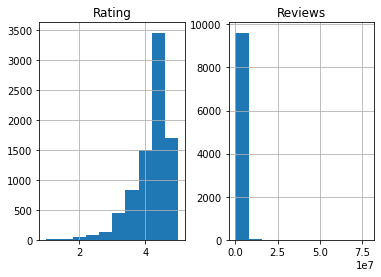

In [58]:
df_Play_Store.hist()

In [60]:
# Checking NAN and CAT values are perfectly filled or not
print(df_Play_Store.isnull().sum())

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64
